In [1]:
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import latex

from ViterbiDec import *

In [2]:
# Generators for Convolutional Codes

# Redundancy generators
generators = [[1,1,1],[1,0,1]]

# Bit receiver
# From index 0 corresponds to [x[n], x[n-1], x[n-2]]


bits_in = [1,1,0,1,0,0,1]

# Finite State Machine descripted for convolutional codes
FSM = [[0b00, None, 0b11, None],
       [0b11, None, 0b00, None],
       [None, 0b10, None, 0b01],
       [None, 0b01, None, 0b10]]

In [3]:
# Testbench

# 2. by p value in BSC from 0.01 to 0.3 by step 0.01
iter  = 1000
total_iter = 0

for i in range(1,33):
    total_iter = total_iter + (i+2) * iter
print(total_iter)

path = 'testbench2/'
filename = 'test'
ext = '.csv'

# createFolder(path)
accu_lst = []
ber_lst  = []
for p in range(1,31):
    n_err  = 0
    n_ber  = 0
    f = open(path + filename + str(p) + ext,'w',newline='')
    wr = csv.writer(f)
    wr.writerow(['No.','bits','Input','Tx','Rx','Decoded','Error'])
    for n in range(1,33):
        for i in range(iter):
            
            bits_in = list(np.random.randint(2, size = n))
            bits_in = bits_in + [0,0]
            
            tx = encode(bits_in, generators)
            rx = bsc(tx, 0.01*p)
            
            decoded, error = viterbi_dec(rx, FSM)
            
            if bits_in != decoded:
                n_err = n_err + 1
                n_ber = n_ber + sum(np.bitwise_xor(bits_in, decoded))
                
                # add error case to new line of csv file
                wr.writerow([n_err,str(n)+" bits",bits_in,tx,rx,decoded,error])
            # if (i+1) % 100 == 0:
            #     print("%d-th iteration test complete." % (i+1))
        
        
    accuracy = n_err / (32*iter)
    ber = n_ber / total_iter
    print(p)
    print("p=%0.2f test complete." % (0.01*p))
    print("Number of error =", n_err)
    print("Number of bit error =", n_ber)
    print("Accuracy =", accuracy)
    print("BER = %f" % ber)
    print()
    
    wr.writerow(["Iteration time = {0}, n_err = {1}, Accuracy = {2}, BER = {3}".format(iter,n_err,accuracy,ber)])
    
    accu_lst.append(accuracy)
    ber_lst.append(ber)



592000
1
p=0.01 test complete.
Number of error = 55
Number of bit error = 91
Accuracy = 0.00171875
BER = 0.000154

2
p=0.02 test complete.
Number of error = 224
Number of bit error = 430
Accuracy = 0.007
BER = 0.000726

3
p=0.03 test complete.
Number of error = 577
Number of bit error = 1171
Accuracy = 0.01803125
BER = 0.001978

4
p=0.04 test complete.
Number of error = 1253
Number of bit error = 2845
Accuracy = 0.03915625
BER = 0.004806

5
p=0.05 test complete.
Number of error = 2100
Number of bit error = 4985
Accuracy = 0.065625
BER = 0.008421

6
p=0.06 test complete.
Number of error = 3186
Number of bit error = 8489
Accuracy = 0.0995625
BER = 0.014340

7
p=0.07 test complete.
Number of error = 4476
Number of bit error = 12463
Accuracy = 0.139875
BER = 0.021052

8
p=0.08 test complete.
Number of error = 6014
Number of bit error = 18569
Accuracy = 0.1879375
BER = 0.031367

9
p=0.09 test complete.
Number of error = 7838
Number of bit error = 25501
Accuracy = 0.2449375
BER = 0.043076

1

In [4]:
# Setting plt parameters
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Serif",

})

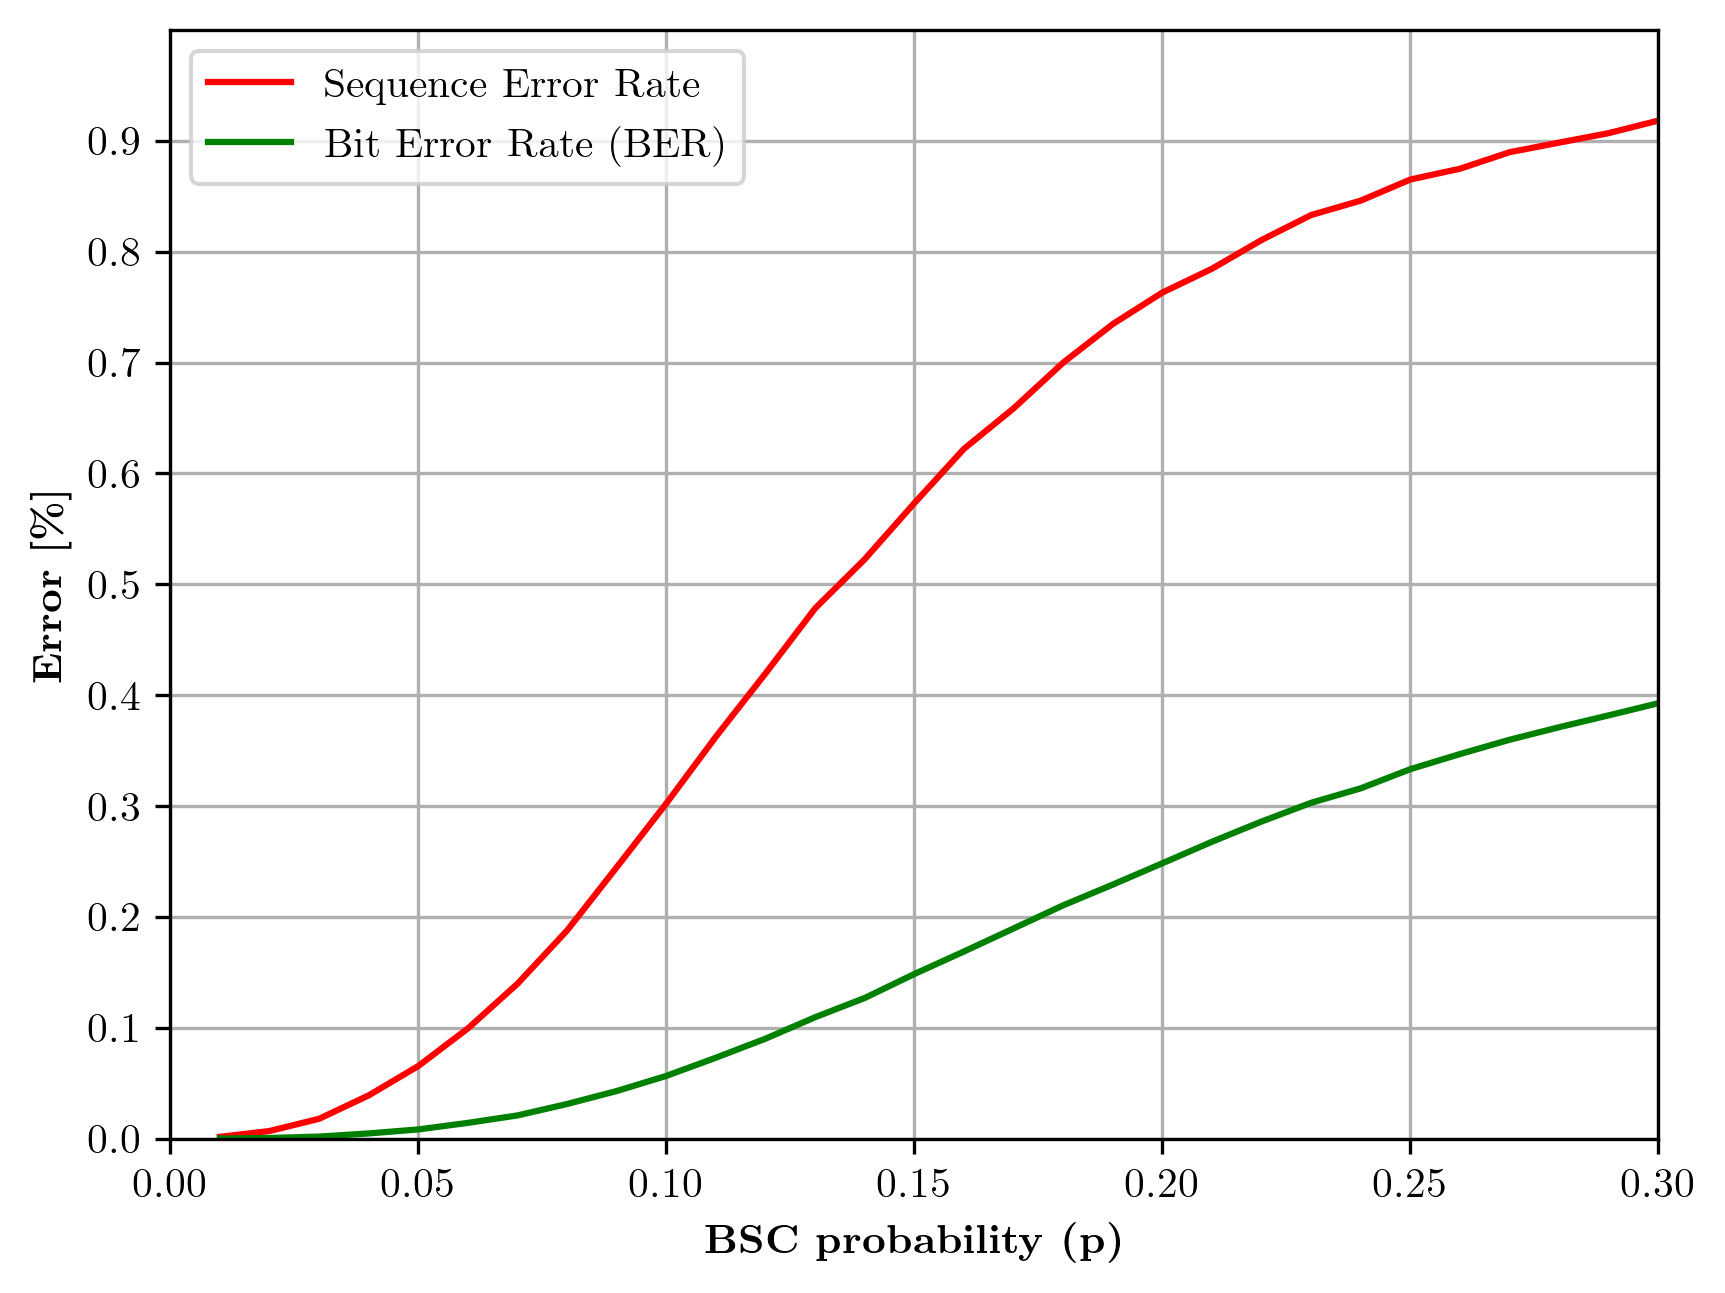

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [10]:
fig = plt.figure(dpi=300)

p = np.arange(0.01,0.31,0.01)
# p = range(1,31)
plt.plot(p, accu_lst, 'r', label='Sequence Error Rate')
plt.plot(p, ber_lst,'g', label='Bit Error Rate (BER)')

plt.xlim([0, 0.3])
plt.ylim([0, 1])

plt.xlabel(r'\textbf{BSC probability (p)}', weight='bold')
plt.ylabel(r'\textbf{Error [\%]}', weight='bold')
plt.yticks(np.arange(0, 1, step=0.1))
# plt.xticks(range(0.01,0.31,0.01))
plt.legend()
plt.grid(True)


plt.show()
fig.savefig('testbench2/error-bsc.eps', format='eps', dpi=300)

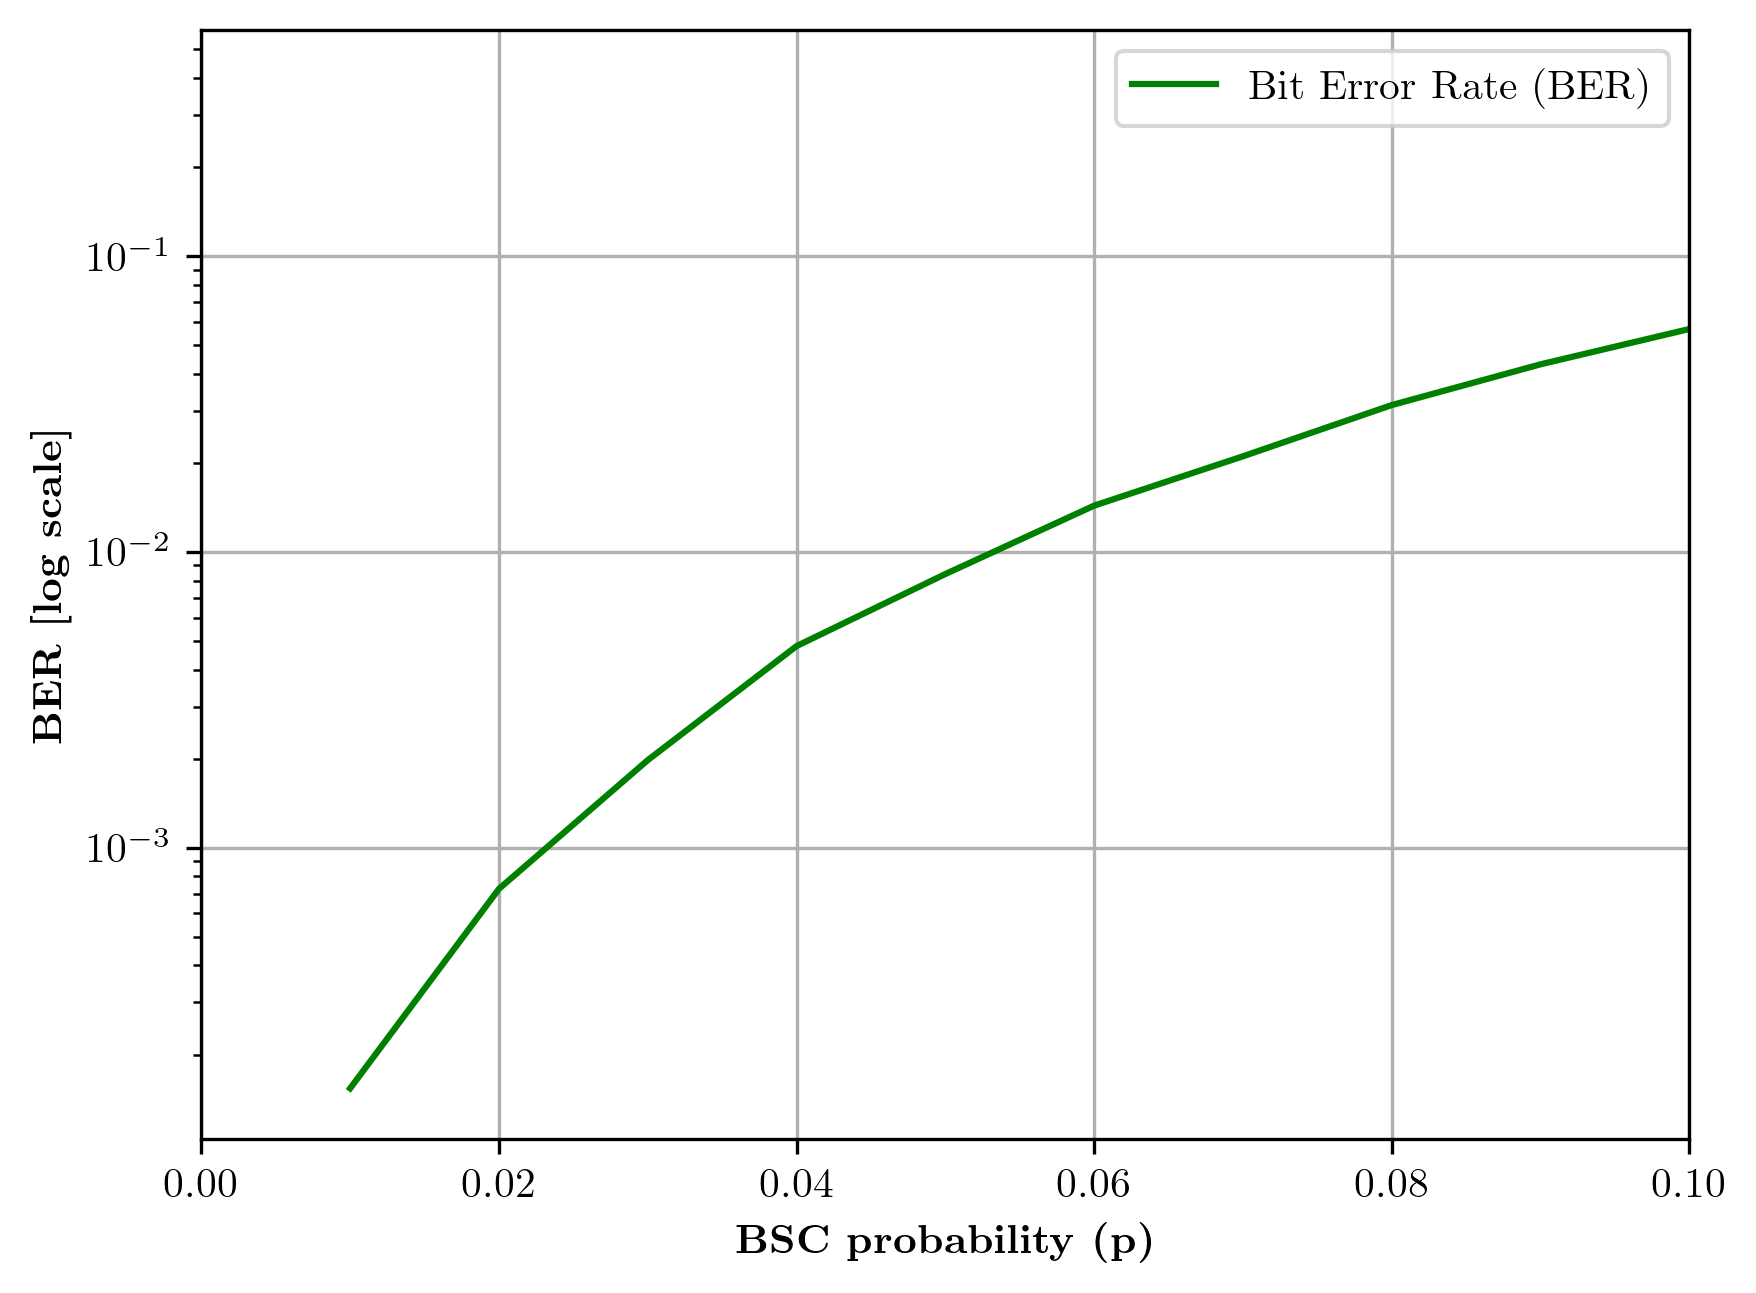

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [24]:
fig2 = plt.figure(dpi=300)

p = np.arange(0.01,0.31,0.01)
# p = range(1,31)
plt.plot(p, ber_lst,'g', label='Bit Error Rate (BER)')

plt.xlim([0, 0.1])
plt.yscale('log', base=10)

plt.xlabel(r'\textbf{BSC probability (p)}', weight='bold')
plt.ylabel(r'\textbf{BER [log scale]}', weight='bold')
# plt.xticks(range(0.01,0.31,0.01))
plt.grid(True)
plt.legend()


plt.show()
fig2.savefig('testbench2/ber-bsc2.eps', format='eps', dpi=300)